In [1]:
#%autoreload
from trace_utils import *
from plot_utils import *
from bad_eggs import *

In [2]:
#LOAD TRACES
work_dir = '/Users/robinhood/O2_outputs/imgproc/traces/wt_pho_esc'
traces_list = []
file_list = [file for file in os.listdir(work_dir) if file[-4:] == '.npy']
for file in file_list:
    filename = os.path.join(work_dir, file)
    traces = load_traces(filename)
    traces_list.append(traces)

In [3]:
bad_eggs

['pho_20210929_BCDKr_3',
 'wt_20210920_BCDKr_17',
 'wt_20210920_BCDKr_18',
 'pho_20210427_gthb_2',
 'wt_20210413_gthb_1',
 'wt_20210413_gthb_2',
 'wt_20210413_gthb_7',
 'wt_20210413_gthb_10',
 'wt_20210413_gthb_11',
 'wt_20210413_gthb_12',
 'wt_20210413_gthb_14',
 'wt_20210413_gthb_16',
 'wt_20210413_gthb_22',
 'wt_20210413_gthb_24',
 'wt_20210413_gthb_27',
 'pho_20210715_krslp_15',
 'pho_20210715_krslp_17',
 'wt_20210706_krslp_1',
 'wt_20210706_krslp_6',
 'wt_20210706_krslp_7',
 'wt_20210706_krslp_11',
 'psc_20210927_krgt_12',
 'psc_20210927_krgt_17',
 'sfmbt_20210926_1',
 'sfmbt_20210926_4',
 'sfmbt_20210926_5',
 'sfmbt_20210926_6',
 'sfmbt_20210926_11',
 'sfmbt_20210926_12',
 'sfmbt_20210926_14',
 'ez_20210924_gtkr_1',
 'ez_20210924_gtkr_5',
 'ez_20210924_gtkr_7',
 'ez_20210924_gtkr_22',
 'ez_20210924_gtkr_25',
 'pho_20210427_gthb_10',
 'pho_20210427_gthb_8',
 'wt_20210413_gthb_1',
 'wt_20210413_gthb_21',
 'wt_20210413_gthb_22',
 'wt_20210413_gthb_27',
 'pho_20210929_BCDKr_7',
 'wt_

In [4]:
#FORMAT DATASTRUCTURE
all_traces = format_trace_datastructure(traces_list, bad_eggs)

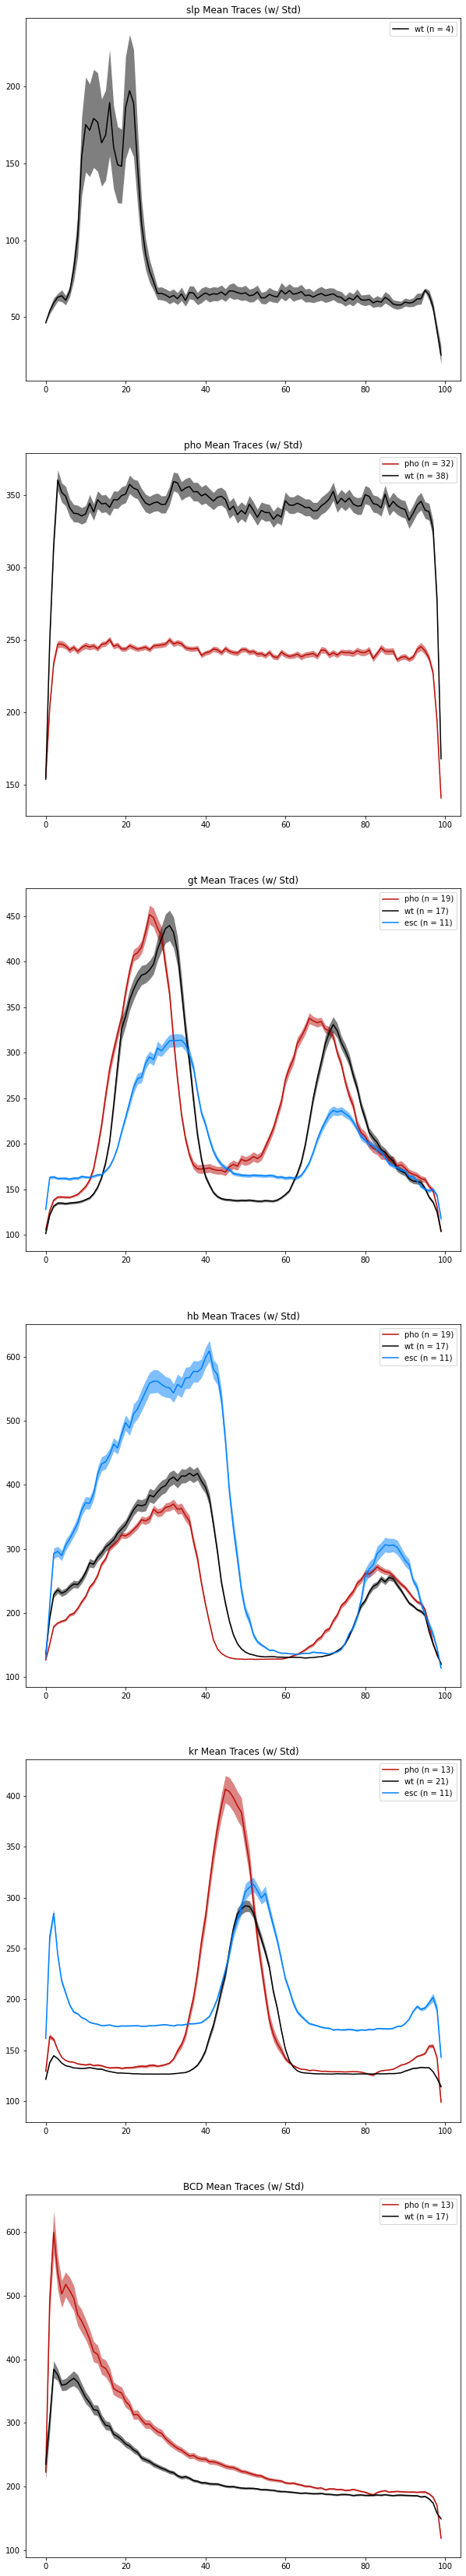

In [5]:
#PLOT
fig = show_all_traces(all_traces)
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_all.svg", format="svg" )

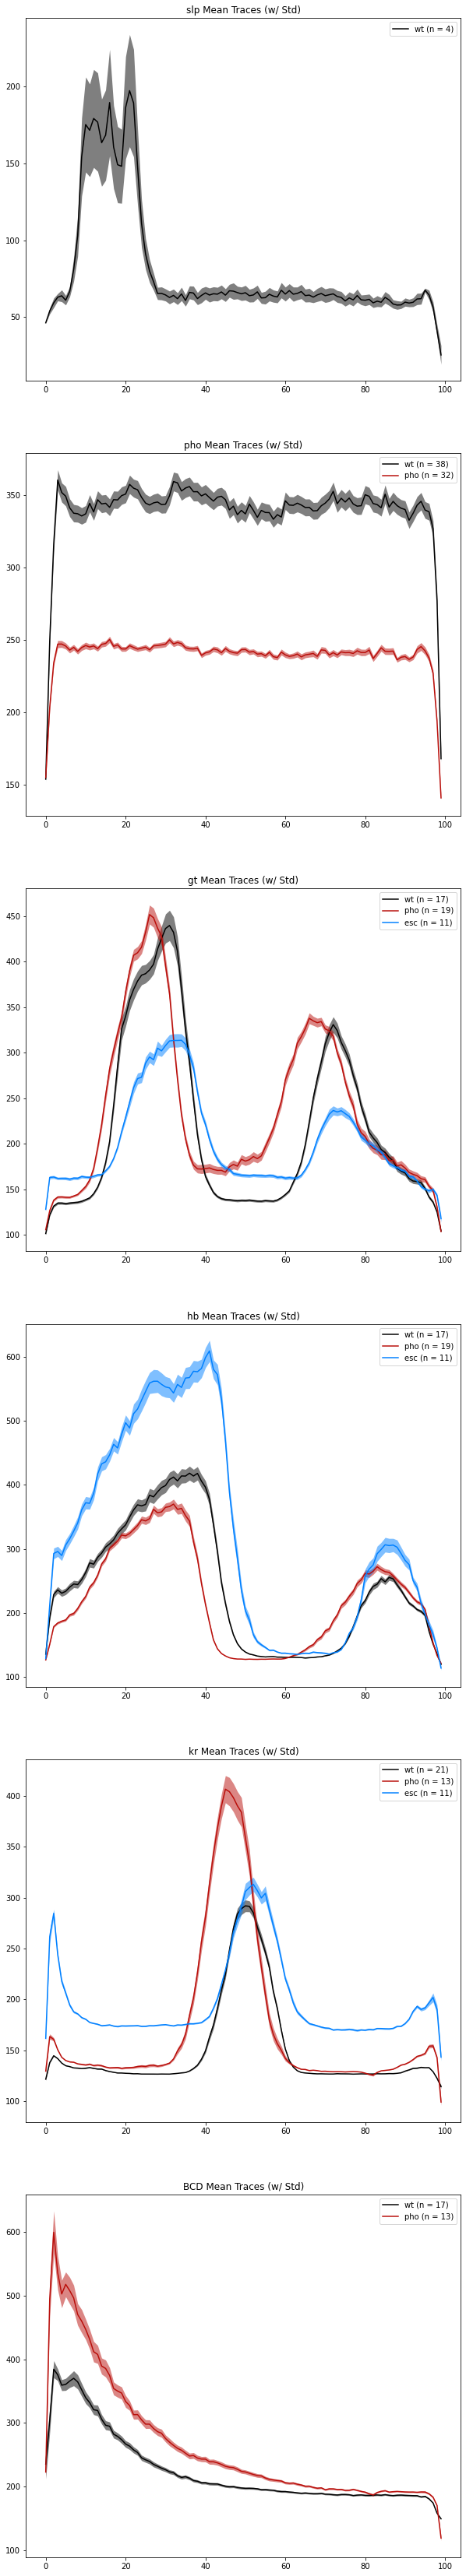

In [6]:
fig = show_all_traces(all_traces, genotypes=['wt', 'pho'], genes=None) #can list which genes/genotypes you want plotted, or omit/set to None to do all

pho_20210427_gthb_10 excluded.
pho_20210427_gthb_20 excluded.
pho_20210427_gthb_2 excluded.
pho_20210427_gthb_4 excluded.
pho_20210427_gthb_7 excluded.
pho_20210427_gthb_8 excluded.
pho_20210429_gthb_26 excluded.
pho_20210429_gthb_2 excluded.
pho_20210429_gthb_30 excluded.
wt_20210413_gthb_10 excluded.
wt_20210413_gthb_11 excluded.
wt_20210413_gthb_12 excluded.
wt_20210413_gthb_14 excluded.
wt_20210413_gthb_16 excluded.
wt_20210413_gthb_17 excluded.
wt_20210413_gthb_18 excluded.
wt_20210413_gthb_1 excluded.
wt_20210413_gthb_21 excluded.
wt_20210413_gthb_22 excluded.
wt_20210413_gthb_24 excluded.
wt_20210413_gthb_27 excluded.
wt_20210413_gthb_2 excluded.
wt_20210413_gthb_30 excluded.
wt_20210413_gthb_3 excluded.
wt_20210413_gthb_7 excluded.
wt_20210510_gthb_8 excluded.
psc_20210927_krgt_12 excluded.
psc_20210927_krgt_17 excluded.
psc_20210927_krgt_24 excluded.
sfmbt_20210926_11 excluded.
sfmbt_20210926_12 excluded.
sfmbt_20210926_14 excluded.
sfmbt_20210926_1 excluded.
sfmbt_20210926_4 

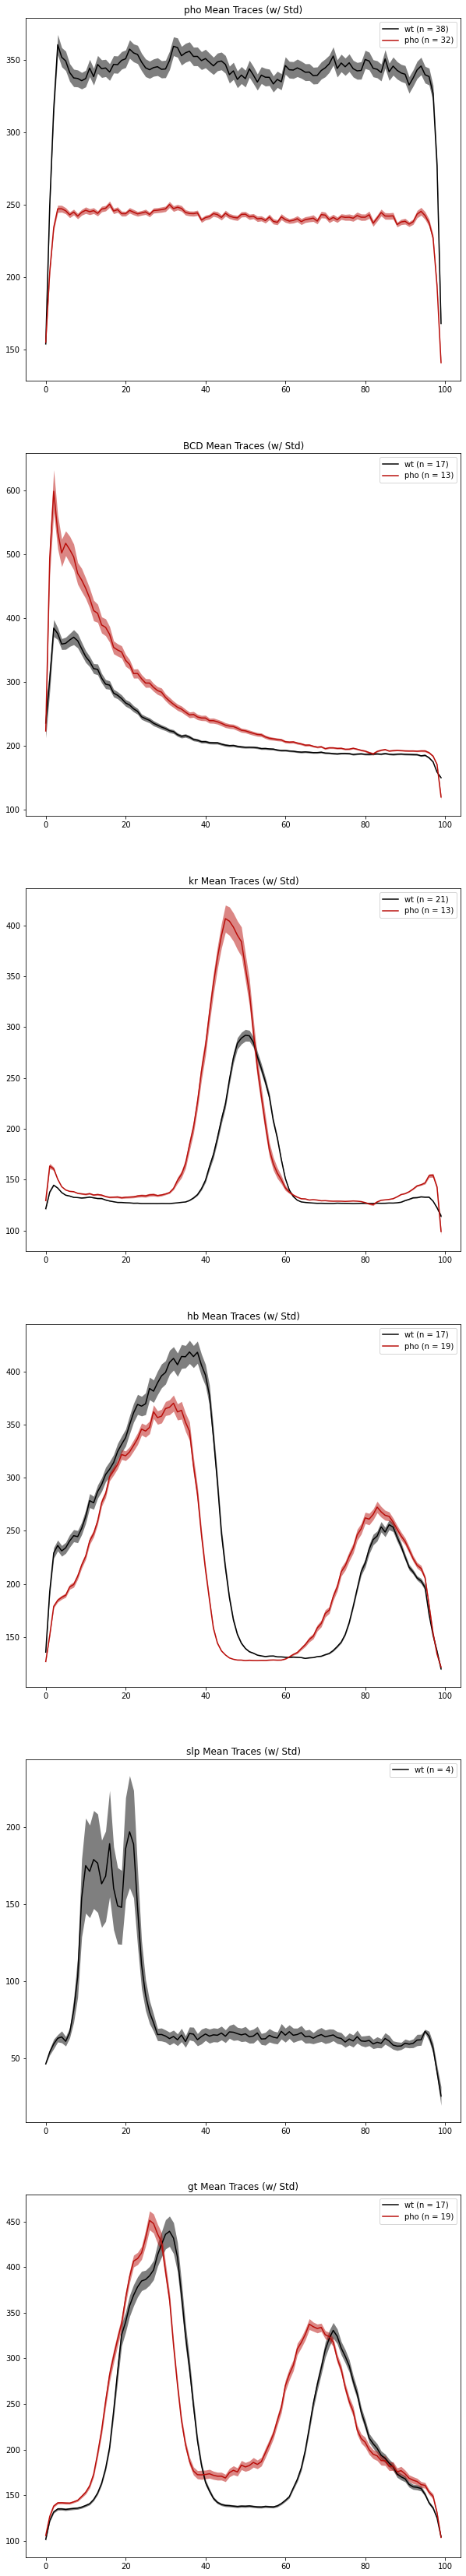

In [41]:
#nc 14a embryos only

from trace_utils import *
from excluded_14 import *

#LOAD TRACES
work_dir = '/Users/robinhood/O2_outputs/imgproc/traces'
traces_list = []
file_list = [file for file in os.listdir(work_dir) if file[-4:] == '.npy']
for file in file_list:
    filename = os.path.join(work_dir, file)
    traces = load_traces(filename)
    traces_list.append(traces)

all_traces = format_trace_datastructure(traces_list, excluded_14)
fig = show_all_traces(all_traces, genotypes=['wt', 'pho'], genes=None)
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/traces_nc14.svg", format="svg" )
# plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_nc14.svg", format="svg" )


In [ ]:
from excluded_14 import *
stage_excluded
excluded = excluded_14+stage_excluded
excluded

pho_20210427_gthb_10 excluded.
pho_20210427_gthb_11 excluded.
pho_20210427_gthb_13 excluded.
pho_20210427_gthb_15 excluded.
pho_20210427_gthb_16 excluded.
pho_20210427_gthb_17 excluded.
pho_20210427_gthb_18 excluded.
pho_20210427_gthb_1 excluded.
pho_20210427_gthb_2 excluded.
pho_20210427_gthb_5 excluded.
pho_20210427_gthb_6 excluded.
pho_20210427_gthb_8 excluded.
pho_20210427_gthb_9 excluded.
pho_20210429_gthb_10 excluded.
pho_20210429_gthb_11 excluded.
pho_20210429_gthb_12 excluded.
pho_20210429_gthb_15 excluded.
pho_20210429_gthb_16 excluded.
pho_20210429_gthb_20 excluded.
pho_20210429_gthb_21 excluded.
pho_20210429_gthb_23 excluded.
pho_20210429_gthb_27 excluded.
wt_20210413_gthb_10 excluded.
wt_20210413_gthb_11 excluded.
wt_20210413_gthb_12 excluded.
wt_20210413_gthb_13 excluded.
wt_20210413_gthb_14 excluded.
wt_20210413_gthb_16 excluded.
wt_20210413_gthb_19 excluded.
wt_20210413_gthb_1 excluded.
wt_20210413_gthb_21 excluded.
wt_20210413_gthb_22 excluded.
wt_20210413_gthb_24 exclu

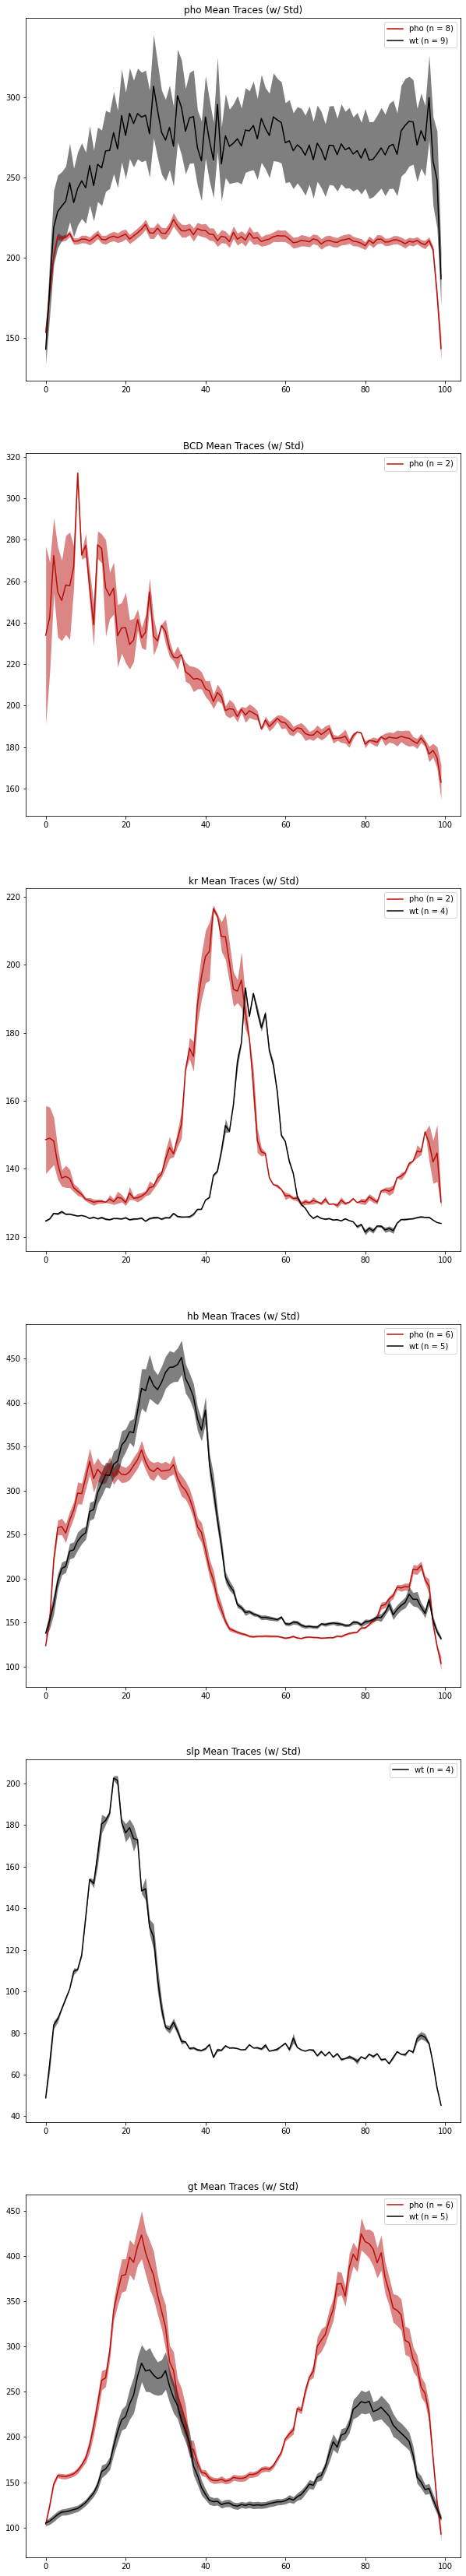

In [40]:
# %load_ext autoreload
%autoreload
from trace_utils import *
from excluded_13 import *

#LOAD TRACES
work_dir = '/Users/robinhood/O2_outputs/imgproc/traces/wt_pho'
traces_list = []
file_list = [file for file in os.listdir(work_dir) if file[-4:] == '.npy']
for file in file_list:
    filename = os.path.join(work_dir, file)
    traces = load_traces(filename)
    traces_list.append(traces)

all_traces = format_trace_datastructure(traces_list, excluded13)
fig = show_all_traces(all_traces)
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/traces_nc13.svg", format="svg" )
# plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_nc13.svg", format="svg" )

In [33]:
'pho_20210929_BCDKr_3.czi' in excluded13

True

pho_20210427_gthb_10 excluded.
pho_20210427_gthb_2 excluded.
pho_20210427_gthb_8 excluded.
wt_20210413_gthb_10 excluded.
wt_20210413_gthb_11 excluded.
wt_20210413_gthb_12 excluded.
wt_20210413_gthb_14 excluded.
wt_20210413_gthb_16 excluded.
wt_20210413_gthb_1 excluded.
wt_20210413_gthb_21 excluded.
wt_20210413_gthb_22 excluded.
wt_20210413_gthb_24 excluded.
wt_20210413_gthb_27 excluded.
wt_20210413_gthb_2 excluded.
wt_20210413_gthb_7 excluded.
psc_20210927_krgt_12 excluded.
psc_20210927_krgt_17 excluded.
sfmbt_20210926_11 excluded.
sfmbt_20210926_12 excluded.
sfmbt_20210926_14 excluded.
sfmbt_20210926_1 excluded.
sfmbt_20210926_4 excluded.
sfmbt_20210926_5 excluded.
sfmbt_20210926_6 excluded.
pho_20210929_BCDKr_3 excluded.
pho_20210929_BCDKr_7 excluded.
wt_20210920_BCDKr_17 excluded.
wt_20210920_BCDKr_18 excluded.
wt_20210920_BCDKr_8 excluded.
ez_20210924_gtkr_15 excluded.
ez_20210924_gtkr_1 excluded.
ez_20210924_gtkr_22 excluded.
ez_20210924_gtkr_25 excluded.
ez_20210924_gtkr_2 exclud

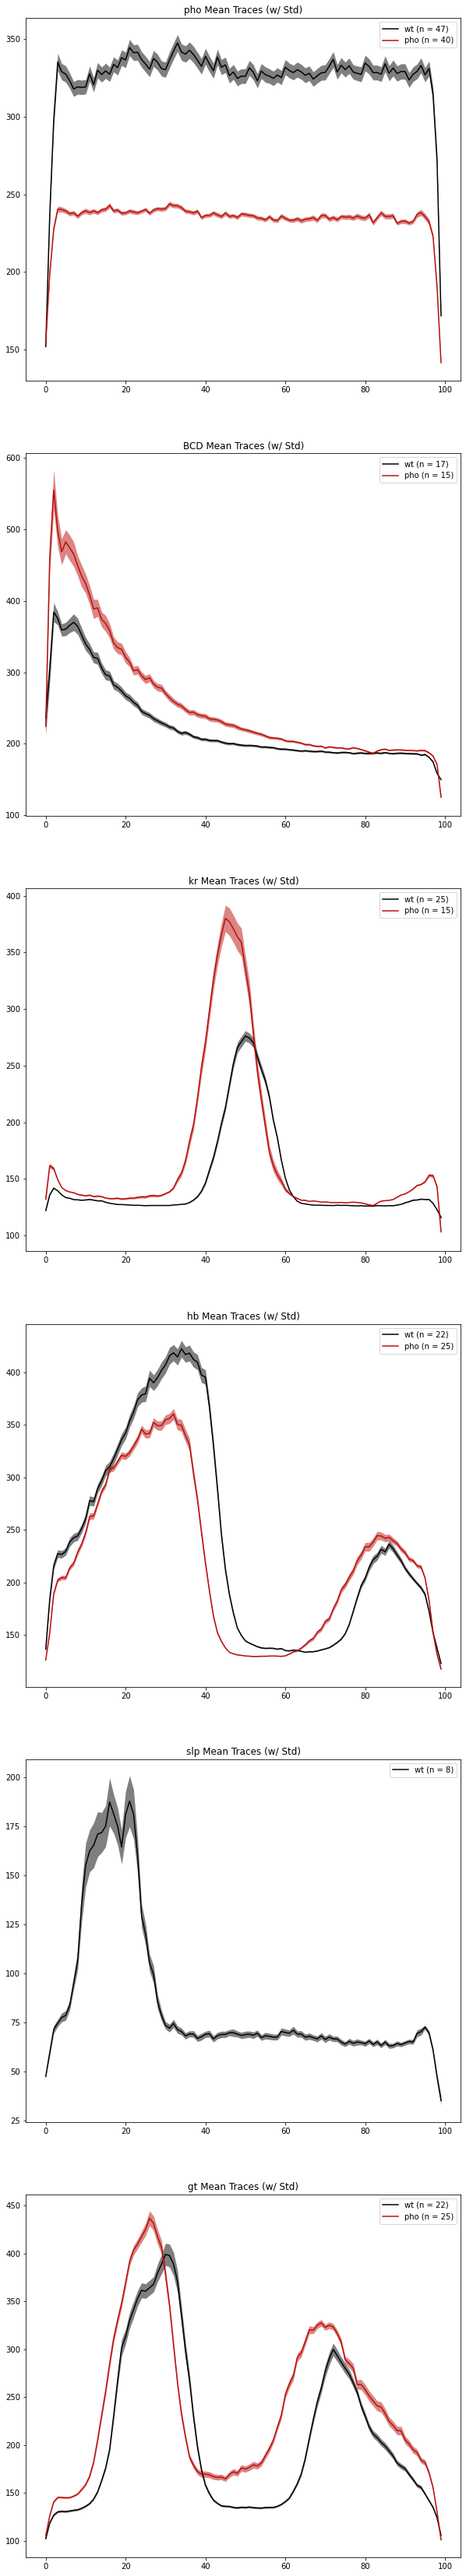

In [43]:
#nc 14a embryos only

from trace_utils import *
from excluded import *

#LOAD TRACES
work_dir = '/Users/robinhood/O2_outputs/imgproc/traces'
traces_list = []
file_list = [file for file in os.listdir(work_dir) if file[-4:] == '.npy']
for file in file_list:
    filename = os.path.join(work_dir, file)
    traces = load_traces(filename)
    traces_list.append(traces)

all_traces = format_trace_datastructure(traces_list, excluded)
fig = show_all_traces(all_traces, genotypes=['wt', 'pho'], genes=None)
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/traces_all.svg", format="svg" )
# plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_nc14.svg", format="svg" )


pho_20210427_gthb_10 excluded.
pho_20210427_gthb_2 excluded.
pho_20210427_gthb_8 excluded.
wt_20210413_gthb_10 excluded.
wt_20210413_gthb_11 excluded.
wt_20210413_gthb_12 excluded.
wt_20210413_gthb_14 excluded.
wt_20210413_gthb_16 excluded.
wt_20210413_gthb_1 excluded.
wt_20210413_gthb_21 excluded.
wt_20210413_gthb_22 excluded.
wt_20210413_gthb_24 excluded.
wt_20210413_gthb_27 excluded.
wt_20210413_gthb_2 excluded.
wt_20210413_gthb_7 excluded.
psc_20210927_krgt_12 excluded.
psc_20210927_krgt_17 excluded.
sfmbt_20210926_11 excluded.
sfmbt_20210926_12 excluded.
sfmbt_20210926_14 excluded.
sfmbt_20210926_1 excluded.
sfmbt_20210926_4 excluded.
sfmbt_20210926_5 excluded.
sfmbt_20210926_6 excluded.
pho_20210929_BCDKr_3 excluded.
pho_20210929_BCDKr_7 excluded.
wt_20210920_BCDKr_17 excluded.
wt_20210920_BCDKr_18 excluded.
wt_20210920_BCDKr_8 excluded.
ez_20210924_gtkr_15 excluded.
ez_20210924_gtkr_1 excluded.
ez_20210924_gtkr_22 excluded.
ez_20210924_gtkr_25 excluded.
ez_20210924_gtkr_2 exclud

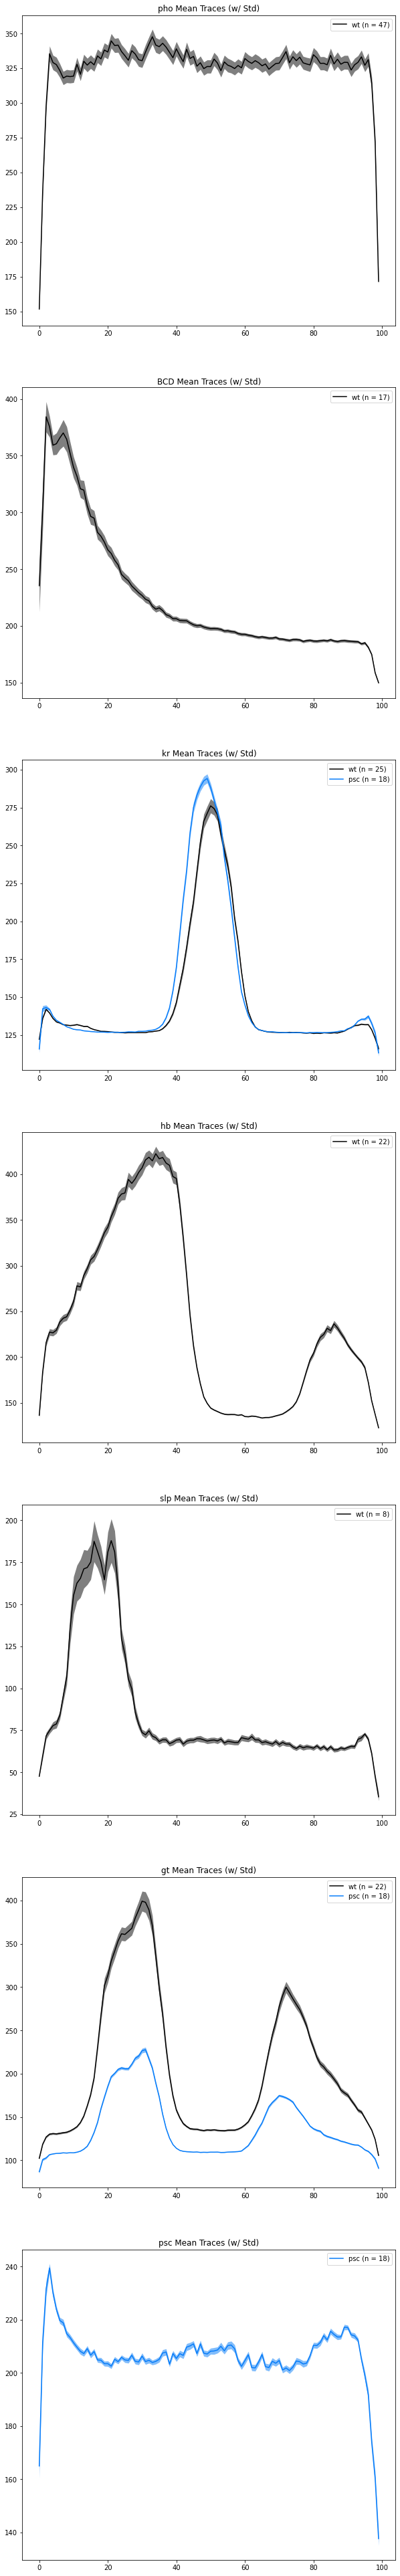

In [44]:
from trace_utils import *
from excluded import *

#LOAD TRACES
work_dir = '/Users/robinhood/O2_outputs/imgproc/traces'
traces_list = []
file_list = [file for file in os.listdir(work_dir) if file[-4:] == '.npy']
for file in file_list:
    filename = os.path.join(work_dir, file)
    traces = load_traces(filename)
    traces_list.append(traces)

all_traces = format_trace_datastructure(traces_list, excluded)
fig = show_all_traces(all_traces, genotypes=['wt', 'psc'], genes=None)
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/traces_psc.svg", format="svg" )

pho_20210427_gthb_10 excluded.
pho_20210427_gthb_2 excluded.
pho_20210427_gthb_8 excluded.
wt_20210413_gthb_10 excluded.
wt_20210413_gthb_11 excluded.
wt_20210413_gthb_12 excluded.
wt_20210413_gthb_14 excluded.
wt_20210413_gthb_16 excluded.
wt_20210413_gthb_1 excluded.
wt_20210413_gthb_21 excluded.
wt_20210413_gthb_22 excluded.
wt_20210413_gthb_24 excluded.
wt_20210413_gthb_27 excluded.
wt_20210413_gthb_2 excluded.
wt_20210413_gthb_7 excluded.
psc_20210927_krgt_12 excluded.
psc_20210927_krgt_17 excluded.
sfmbt_20210926_11 excluded.
sfmbt_20210926_12 excluded.
sfmbt_20210926_14 excluded.
sfmbt_20210926_1 excluded.
sfmbt_20210926_4 excluded.
sfmbt_20210926_5 excluded.
sfmbt_20210926_6 excluded.
pho_20210929_BCDKr_3 excluded.
pho_20210929_BCDKr_7 excluded.
wt_20210920_BCDKr_17 excluded.
wt_20210920_BCDKr_18 excluded.
wt_20210920_BCDKr_8 excluded.
ez_20210924_gtkr_15 excluded.
ez_20210924_gtkr_1 excluded.
ez_20210924_gtkr_22 excluded.
ez_20210924_gtkr_25 excluded.
ez_20210924_gtkr_2 exclud

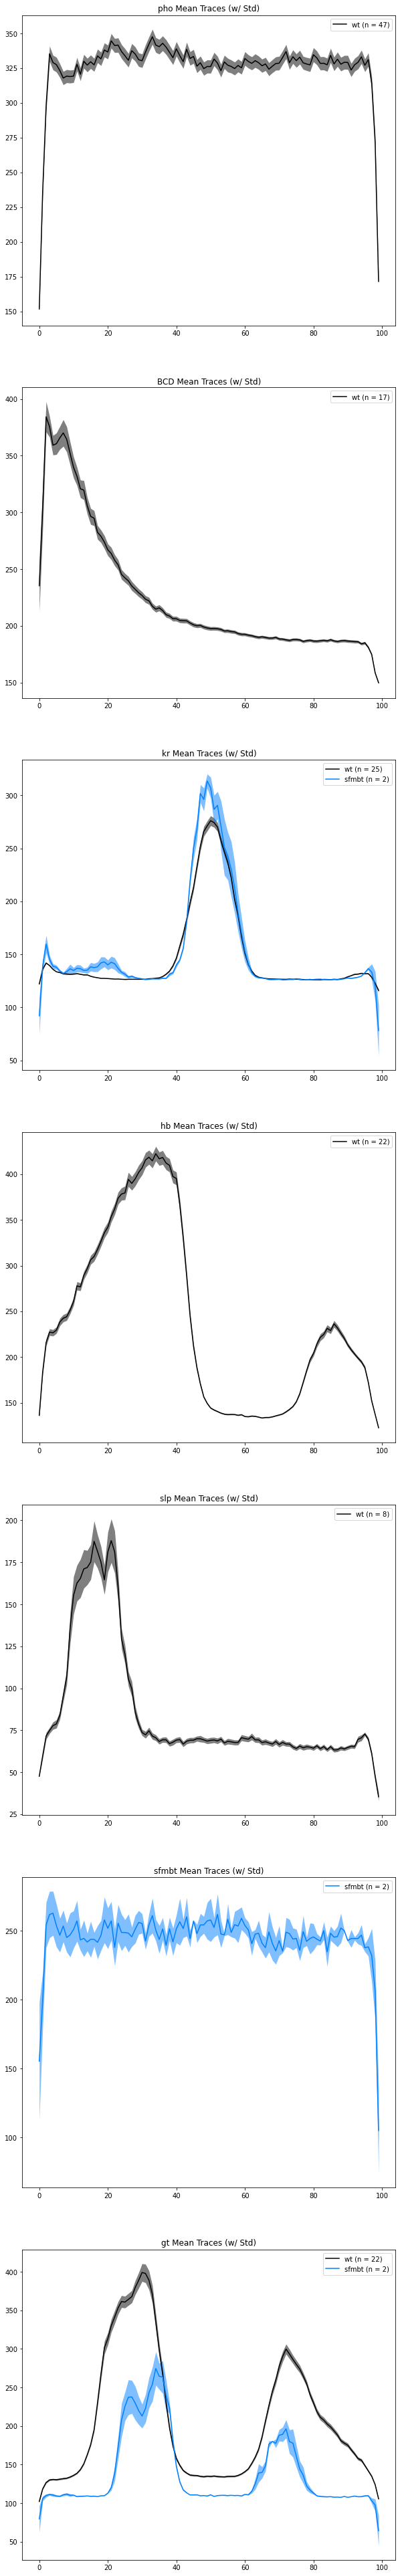

In [46]:
from trace_utils import *
from excluded import *

#LOAD TRACES
work_dir = '/Users/robinhood/O2_outputs/imgproc/traces'
traces_list = []
file_list = [file for file in os.listdir(work_dir) if file[-4:] == '.npy']
for file in file_list:
    filename = os.path.join(work_dir, file)
    traces = load_traces(filename)
    traces_list.append(traces)

all_traces = format_trace_datastructure(traces_list, excluded)
fig = show_all_traces(all_traces, genotypes=['wt', 'sfmbt'], genes=None)
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/traces_sfmbt.svg", format="svg" )
# plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_nc14.svg", format="svg" )

In [57]:
from trace_utils import *
from excluded_14 import *

#LOAD TRACES
work_dir = '/Users/robinhood/O2_outputs/imgproc/traces'
traces_list = []
file_list = [file for file in os.listdir(work_dir) if file[-4:] == '.npy']
for file in file_list:
    filename = os.path.join(work_dir, file)
    traces = load_traces(filename)
    traces_list.append(traces)

all_traces = format_trace_datastructure(traces_list, excluded_14)
fig = show_all_traces(all_traces, genotypes=['wt'], genes='hb', 'BCD', 'kr', 'gt')
# plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/traces_pcs.svg", format="svg" )
# plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/wt_pho/traces_nc14.svg", format="svg" )

SyntaxError: positional argument follows keyword argument (3142988889.py, line 14)

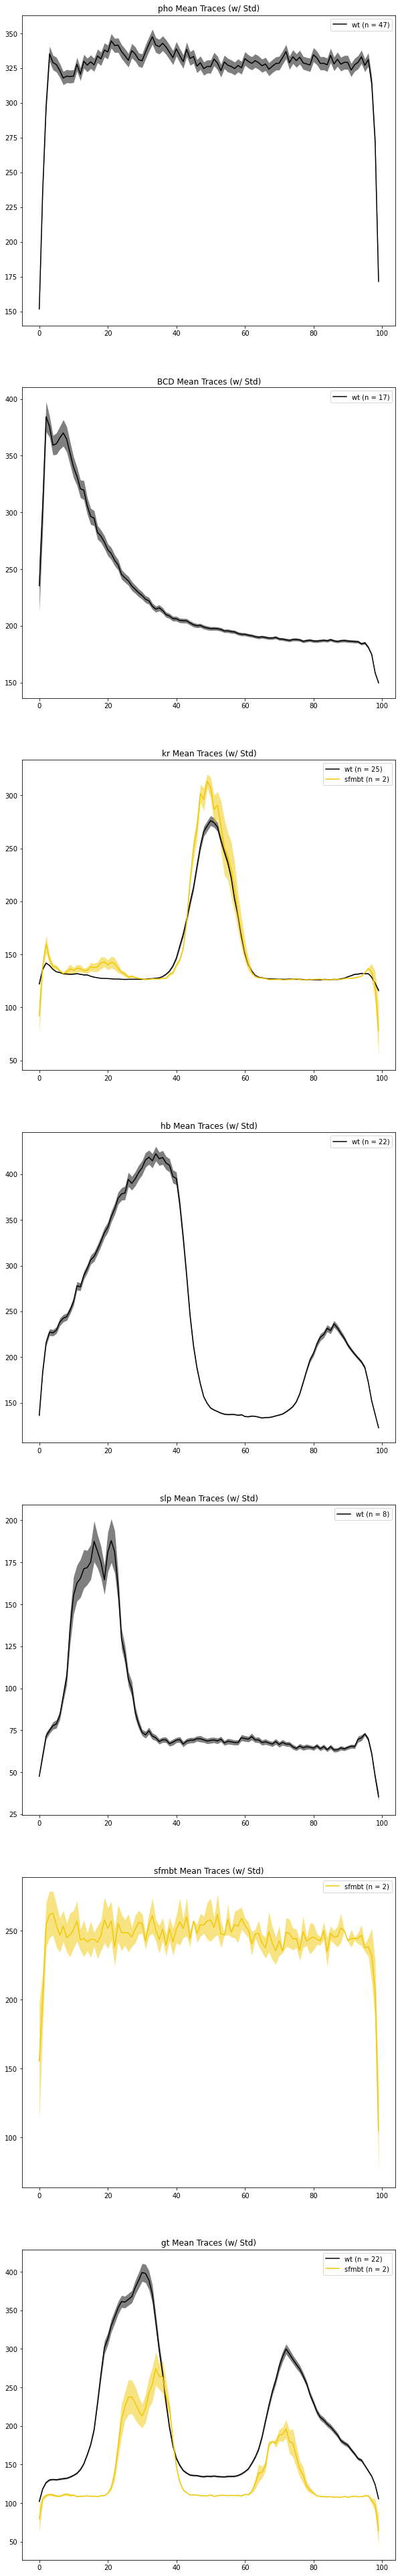

In [56]:
genotypes = list(all_traces.keys())
color_dict = get_color_dict(genotypes)
fig = show_all_traces(all_traces, color_dict=color_dict, genotypes=['wt', 'sfmbt'])
plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/traces_sfmbt.svg", format="svg" )

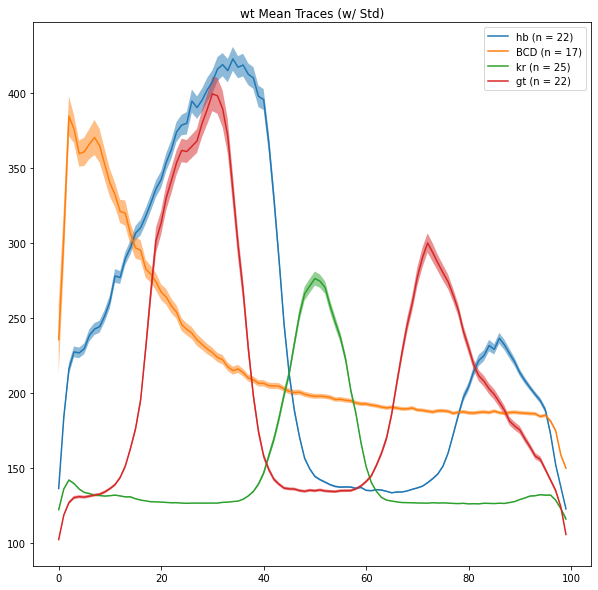

In [67]:
genotype = 'wt'
# genes = list(all_traces[genotype].keys())
genes = ['hb', 'BCD', 'kr', 'gt']
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for gene in genes:
    if gene not in all_traces[genotype].keys():
        continue
    traces = all_traces[genotype][gene]
    mean_traces = np.nanmean(traces, 1)
    n = mean_traces.shape[0]
    mean = np.nanmean(mean_traces, 0)
    error = np.nanstd(mean_traces, 0) / mean_traces.shape[0]
    ax.fill_between(np.arange(mean.shape[0]), mean-error, mean+error, alpha=0.5, linewidth=0)#, color=color_dict[genotype])
    ax.plot(mean, label=f'{gene} (n = {n})')#, color=color_dict[genotype])
    ax.set_title(f'{genotype} Mean Traces (w/ Std)')
    ax.legend()

    plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/traces_wtall.svg", format="svg" )

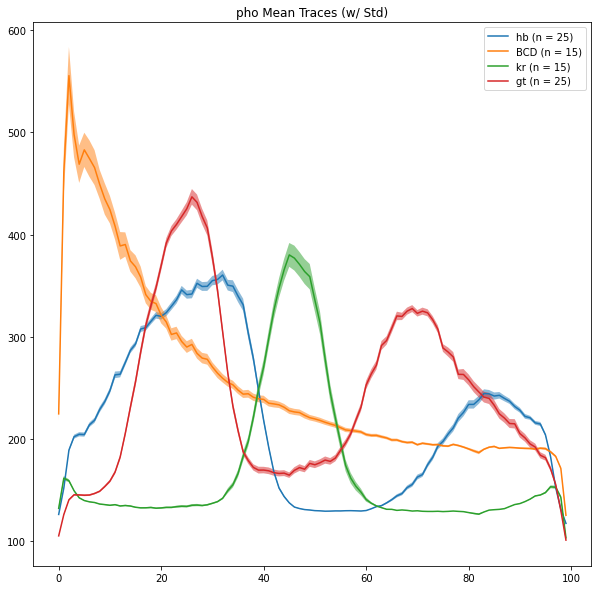

In [65]:
genotype = 'pho'
# genes = list(all_traces[genotype].keys())
genes = ['hb', 'BCD', 'kr', 'gt']
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for gene in genes:
    if gene not in all_traces[genotype].keys():
        continue
    traces = all_traces[genotype][gene]
    mean_traces = np.nanmean(traces, 1)
    n = mean_traces.shape[0]
    mean = np.nanmean(mean_traces, 0)
    error = np.nanstd(mean_traces, 0) / mean_traces.shape[0]
    ax.fill_between(np.arange(mean.shape[0]), mean-error, mean+error, alpha=0.5, linewidth=0)#, color=color_dict[genotype])
    ax.plot(mean, label=f'{gene} (n = {n})')#, color=color_dict[genotype])
    ax.set_title(f'{genotype} Mean Traces (w/ Std)')
    ax.legend()

    plt.savefig("/Users/robinhood/O2_outputs/imgproc/traces/traces_phoall.svg", format="svg" )